# Capstone Project: End-to-End Data Science Project

## Web Scraping

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Set up WebDriver
options = Options()
options.add_argument("--headless")  
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Categories and Search Queries
categories = {
    "Grocery": ["Rice", "Pulses", "Cooking+Oil", "Snacks"],
    "Mobiles": ["Smartphones", "Android+Phones", "iPhones", "Budget+Phones"],
    "Electronics": ["Laptops", "Headphones", "Smartwatches", "Tablets"],
    "Books": ["Fiction+Books", "Self+Help+Books", "Educational+Books", "Business+Books"]
}

# Base URL
base_url = "https://www.amazon.in/s?k={}&page={}"

# Data Storage
titles, prices, ratings, num_reviews, categories_list = [], [], [], [], []

def extract_data(category):
    """Extract product details from the current page."""
    soup = BeautifulSoup(driver.page_source, "html.parser")
    products = soup.findAll('div', {'data-component-type': 's-search-result'})

    for product in products:
        try:
            title = product.find('span').get_text(strip=True) if product.find('span') else "Unknown"
            price = product.find('span', class_='a-price-whole')
            price_value = price.get_text(strip=True) if price else "0"
            rating_tag = product.find('span', class_="a-icon-alt")
            rating_value = rating_tag.get_text(strip=True).split(" ")[0] if rating_tag else "0"
            reviews_tag = product.find('span', class_='a-size-base s-underline-text')
            reviews_value = reviews_tag.get_text(strip=True) if reviews_tag else "0"
            
            # Append to lists
            titles.append(title)
            prices.append(price_value)
            ratings.append(rating_value)
            num_reviews.append(reviews_value)
            categories_list.append(category)

        except Exception as e:
            print(f"Error extracting data: {e}")

# Scraping loop
for category, search_queries in categories.items():
    for query in search_queries:
        for page in range(1, 6):  # Scraping 5 pages per query
            url = base_url.format(query, page)
            print(f"Scraping: {url}")

            driver.get(url)
            time.sleep(random.uniform(4, 7))  # Randomized sleep

            try:
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div.s-main-slot"))
                )
            except:
                print(f"Page load timeout on {url}")
                continue
            
            extract_data(category)

driver.quit()

Scraping: https://www.amazon.in/s?k=Rice&page=1
Scraping: https://www.amazon.in/s?k=Rice&page=2
Scraping: https://www.amazon.in/s?k=Rice&page=3
Scraping: https://www.amazon.in/s?k=Rice&page=4
Scraping: https://www.amazon.in/s?k=Rice&page=5
Scraping: https://www.amazon.in/s?k=Pulses&page=1
Scraping: https://www.amazon.in/s?k=Pulses&page=2
Scraping: https://www.amazon.in/s?k=Pulses&page=3
Scraping: https://www.amazon.in/s?k=Pulses&page=4
Scraping: https://www.amazon.in/s?k=Pulses&page=5
Scraping: https://www.amazon.in/s?k=Cooking+Oil&page=1
Scraping: https://www.amazon.in/s?k=Cooking+Oil&page=2
Scraping: https://www.amazon.in/s?k=Cooking+Oil&page=3
Scraping: https://www.amazon.in/s?k=Cooking+Oil&page=4
Scraping: https://www.amazon.in/s?k=Cooking+Oil&page=5
Scraping: https://www.amazon.in/s?k=Snacks&page=1
Scraping: https://www.amazon.in/s?k=Snacks&page=2
Scraping: https://www.amazon.in/s?k=Snacks&page=3
Scraping: https://www.amazon.in/s?k=Snacks&page=4
Scraping: https://www.amazon.in/s?k

## Data Collection

In [4]:
# Store data in a DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Number of Reviews": num_reviews,
    "Category": categories_list
})

In [6]:
df

,Title,Price,Rating,Number of Reviews,Category
0,Best sellerin BasmatiDaawat Rozana Super Basma...,349,4.0,"18,904",Grocery
1,"Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...",290,3.9,"4,420",Grocery
2,India Gate Basmati Rice Everyday 5 kg3.8 out o...,362,3.8,"2,447",Grocery
3,Best sellerin Sona MasuriDaawat Sona masuri 5 ...,332,4.1,"1,304",Grocery
4,"FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...",550,4.1,"2,934",Grocery
...,...,...,...,...,...
2442,Business Kohinoor: The Inspiring Journey of Ra...,155,4.3,402,Books
2443,Stock Investing Mastermind Beginners Handbook ...,"1,490",4.4,618,Books
2444,Financial Statement Analysis Handbook - How to...,"1,490",4.2,250,Books
2445,Best sellerin Economic HistorySponsoredSponsor...,139,4.4,"80,010",Books


In [8]:
# Save to CSV
df.to_csv("amazon_scraped_data.csv", index=False)
print("Scraping complete. Data saved to amazon_scraped_data.csv")

Scraping complete. Data saved to amazon_scraped_data.csv


In [10]:
df = pd.read_csv(r"amazon_scraped_data.csv")

## Data Understanding

In [13]:
df.head()

,Title,Price,Rating,Number of Reviews,Category
0,Best sellerin BasmatiDaawat Rozana Super Basma...,349,4.0,"18,904",Grocery
1,"Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...",290,3.9,"4,420",Grocery
2,India Gate Basmati Rice Everyday 5 kg3.8 out o...,362,3.8,"2,447",Grocery
3,Best sellerin Sona MasuriDaawat Sona masuri 5 ...,332,4.1,"1,304",Grocery
4,"FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...",550,4.1,"2,934",Grocery


In [15]:
df.tail()

,Title,Price,Rating,Number of Reviews,Category
2442,Business Kohinoor: The Inspiring Journey of Ra...,155,4.3,402,Books
2443,Stock Investing Mastermind Beginners Handbook ...,"1,490",4.4,618,Books
2444,Financial Statement Analysis Handbook - How to...,"1,490",4.2,250,Books
2445,Best sellerin Economic HistorySponsoredSponsor...,139,4.4,"80,010",Books
2446,SponsoredSponsoredYou are seeing this ad based...,"3,978",3.9,2,Books


In [17]:
df.describe()

,Rating
count,2447.000000
mean,3.951206
std,1.013090
min,0.000000
25%,4.000000
50%,4.200000
75%,4.400000
max,5.000000


In [19]:
df.columns

Index(['Title', 'Price', 'Rating', 'Number of Reviews', 'Category'], dtype='object')

In [21]:
df.dtypes

Title                 object
Price                 object
Rating               float64
Number of Reviews     object
Category              object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2447 non-null   object 
 1   Price              2447 non-null   object 
 2   Rating             2447 non-null   float64
 3   Number of Reviews  2447 non-null   object 
 4   Category           2447 non-null   object 
dtypes: float64(1), object(4)
memory usage: 95.7+ KB


In [25]:
df.nunique()

Title                2198
Price                 848
Rating                 30
Number of Reviews    1151
Category                4
dtype: int64

In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2442    False
2443    False
2444    False
2445    False
2446    False
Length: 2447, dtype: bool

In [29]:
df.duplicated().sum()

244

In [31]:
df.isnull().sum()

Title                0
Price                0
Rating               0
Number of Reviews    0
Category             0
dtype: int64

In [33]:
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+(?:\.\d+)?)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating_Category'] = df['Rating'].apply(lambda x: 'bad' if pd.notna(x) and x < 4.0 else ('good' if pd.notna(x) else 'unknown'))
print(df)

                                                  Title  Price  Rating  \
0     Best sellerin BasmatiDaawat Rozana Super Basma...    349     4.0   
1     Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...    290     3.9   
2     India Gate Basmati Rice Everyday 5 kg3.8 out o...    362     3.8   
3     Best sellerin Sona MasuriDaawat Sona masuri 5 ...    332     4.1   
4     FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...    550     4.1   
...                                                 ...    ...     ...   
2442  Business Kohinoor: The Inspiring Journey of Ra...    155     4.3   
2443  Stock Investing Mastermind Beginners Handbook ...  1,490     4.4   
2444  Financial Statement Analysis Handbook - How to...  1,490     4.2   
2445  Best sellerin Economic HistorySponsoredSponsor...    139     4.4   
2446  SponsoredSponsoredYou are seeing this ad based...  3,978     3.9   

     Number of Reviews Category Rating_Category  
0               18,904  Grocery            good  
1          

In [35]:
df.head()

,Title,Price,Rating,Number of Reviews,Category,Rating_Category
0,Best sellerin BasmatiDaawat Rozana Super Basma...,349,4.0,"18,904",Grocery,good
1,"Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...",290,3.9,"4,420",Grocery,bad
2,India Gate Basmati Rice Everyday 5 kg3.8 out o...,362,3.8,"2,447",Grocery,bad
3,Best sellerin Sona MasuriDaawat Sona masuri 5 ...,332,4.1,"1,304",Grocery,good
4,"FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...",550,4.1,"2,934",Grocery,good


### Removing duplicates

In [38]:
df = df[df.duplicated(keep=False) == False].reset_index(drop=True)
df

,Title,Price,Rating,Number of Reviews,Category,Rating_Category
0,Best sellerin BasmatiDaawat Rozana Super Basma...,349,4.0,"18,904",Grocery,good
1,"Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...",290,3.9,"4,420",Grocery,bad
2,India Gate Basmati Rice Everyday 5 kg3.8 out o...,362,3.8,"2,447",Grocery,bad
3,Best sellerin Sona MasuriDaawat Sona masuri 5 ...,332,4.1,"1,304",Grocery,good
4,"FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...",550,4.1,"2,934",Grocery,good
...,...,...,...,...,...,...
2022,Business Kohinoor: The Inspiring Journey of Ra...,155,4.3,402,Books,good
2023,Stock Investing Mastermind Beginners Handbook ...,"1,490",4.4,618,Books,good
2024,Financial Statement Analysis Handbook - How to...,"1,490",4.2,250,Books,good
2025,Best sellerin Economic HistorySponsoredSponsor...,139,4.4,"80,010",Books,good


In [40]:
df.duplicated().sum()

0

### Removing unwanted rows

In [43]:
df = df[~df["Title"].str.contains("sponsored", case=False, na=False)].reset_index(drop=True)
df

,Title,Price,Rating,Number of Reviews,Category,Rating_Category
0,Best sellerin BasmatiDaawat Rozana Super Basma...,349,4.0,"18,904",Grocery,good
1,"Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...",290,3.9,"4,420",Grocery,bad
2,India Gate Basmati Rice Everyday 5 kg3.8 out o...,362,3.8,"2,447",Grocery,bad
3,Best sellerin Sona MasuriDaawat Sona masuri 5 ...,332,4.1,"1,304",Grocery,good
4,"FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...",550,4.1,"2,934",Grocery,good
...,...,...,...,...,...,...
1721,The Man Who Solved the Market: How Jim Simons ...,217.,4.4,"4,785",Books,good
1722,GOOD STRATEGY/BAD STRATEGY (NEW ED)byRichard R...,310,4.5,"4,395",Books,good
1723,Business Kohinoor: The Inspiring Journey of Ra...,155,4.3,402,Books,good
1724,Stock Investing Mastermind Beginners Handbook ...,"1,490",4.4,618,Books,good


### Changing data types

In [46]:
df.columns = df.columns.str.replace(r"\s+", " ", regex=True).str.strip()

df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Number of Reviews"] = pd.to_numeric(df["Number of Reviews"], errors="coerce")

In [48]:
df.dtypes

Title                 object
Price                float64
Rating               float64
Number of Reviews    float64
Category              object
Rating_Category       object
dtype: object

## Exploratory data analysis(EDA)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

### Univariate Analysis

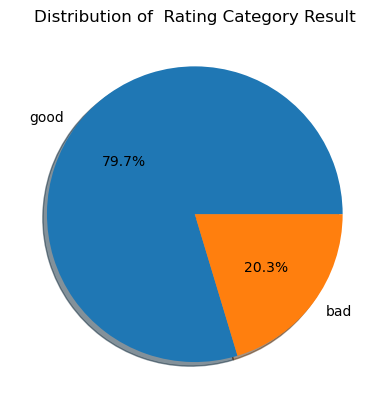

In [54]:
df_count = df['Rating_Category'].value_counts()
plt.pie(df_count, labels=df_count.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of  Rating Category Result')
plt.show()

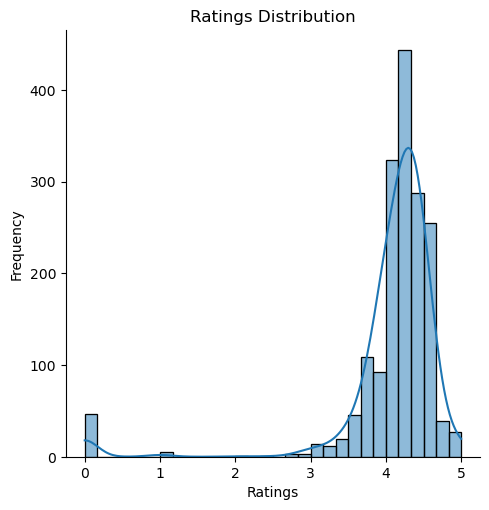

In [57]:
sns.displot(df['Rating'], bins=30, kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

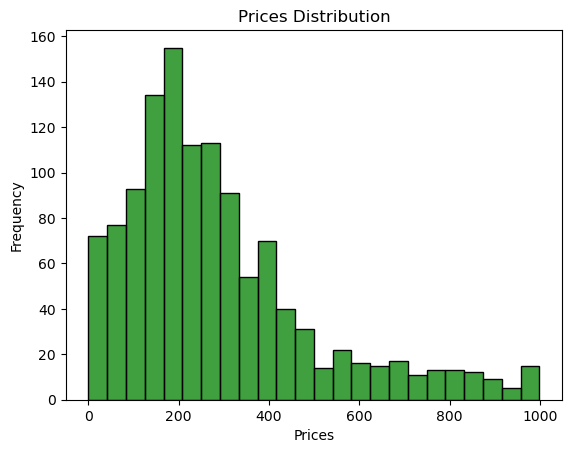

In [59]:
sns.histplot(x="Price", data=df,color="green")
plt.title("Prices Distribution")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.show()

In [61]:
df.groupby("Rating_Category")["Rating"].count()

Rating_Category
bad      351
good    1375
Name: Rating, dtype: int64

### Bi-variate Analysis

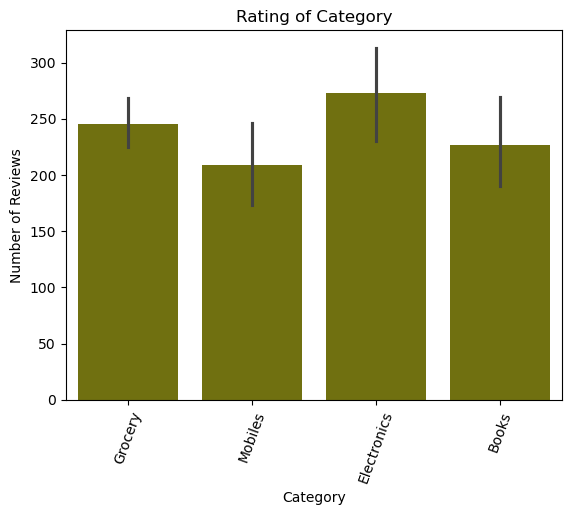

In [64]:
sns.barplot(x="Category",y="Number of Reviews",data=df,color="olive")
plt.title("Rating of Category")
plt.xticks(rotation=70)
plt.show()

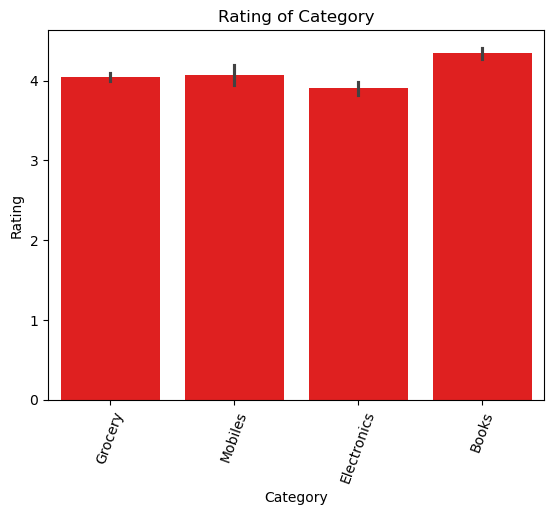

In [66]:
sns.barplot(x="Category",y="Rating",data=df,color="red")
plt.title("Rating of Category")
plt.xticks(rotation=70)
plt.show()

### Multi_variate Analysis

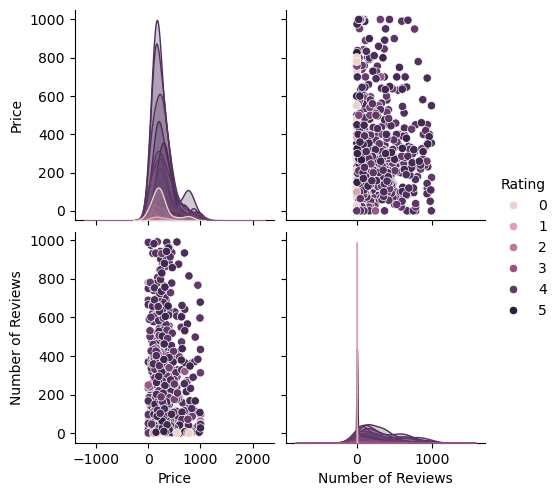

In [69]:
df_ = ['Price', 'Number of Reviews', 'Rating']
sns.pairplot(df[df_], diag_kind="kde",hue="Rating")  
plt.show()

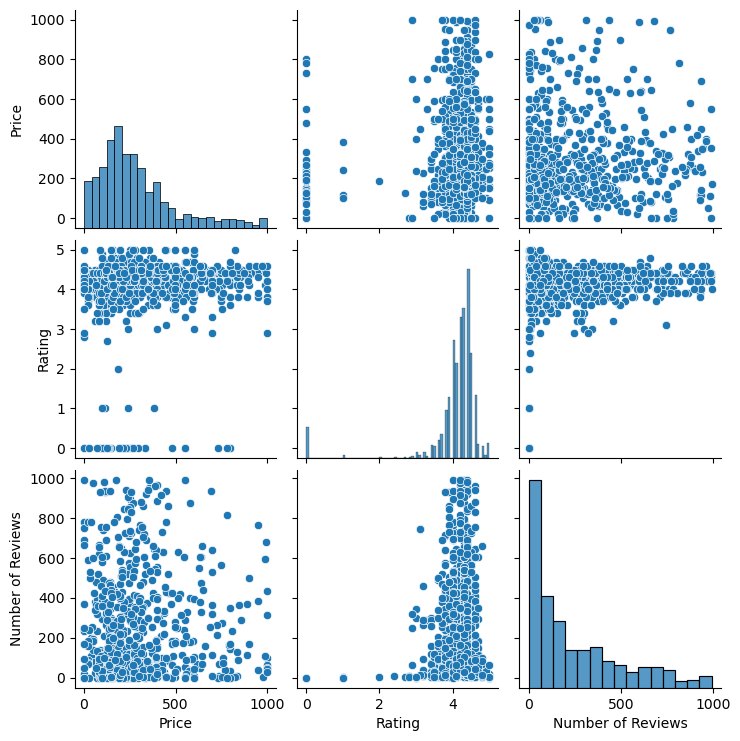

In [71]:
sns.pairplot(df)

## UNSUPERVISOD LEARNING

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [147]:
# Load the dataset
df = pd.read_csv("amazon_scraped_data.csv")

In [149]:
# Convert Price, Rating, and Number of Reviews to numeric values
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')
df["Number of Reviews"] = pd.to_numeric(df["Number of Reviews"], errors='coerce')

In [151]:
# Drop missing values
df = df.dropna()

In [153]:
# Select relevant features for clustering
features = df[["Price", "Rating", "Number of Reviews"]]

In [155]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [157]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

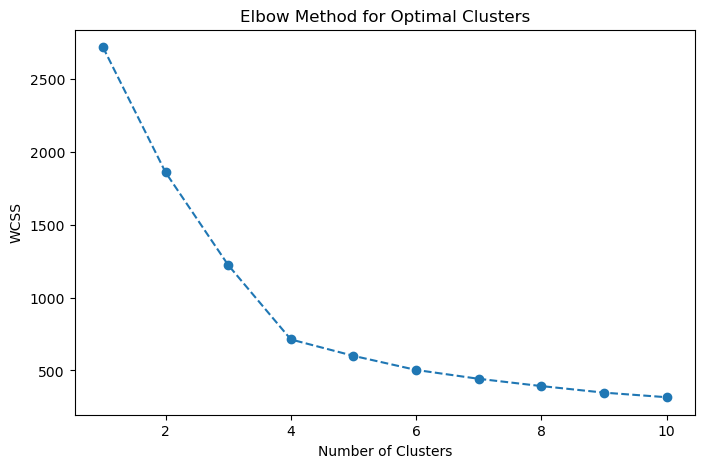

In [158]:
# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [159]:
# Based on the elbow method, choose an optimal cluster number (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

In [160]:
# Save the clustered data
df.to_csv("amazon_clustered_data.csv", index=False)
print("Clustering complete. Results saved to amazon_clustered_data.csv")

Clustering complete. Results saved to amazon_clustered_data.csv


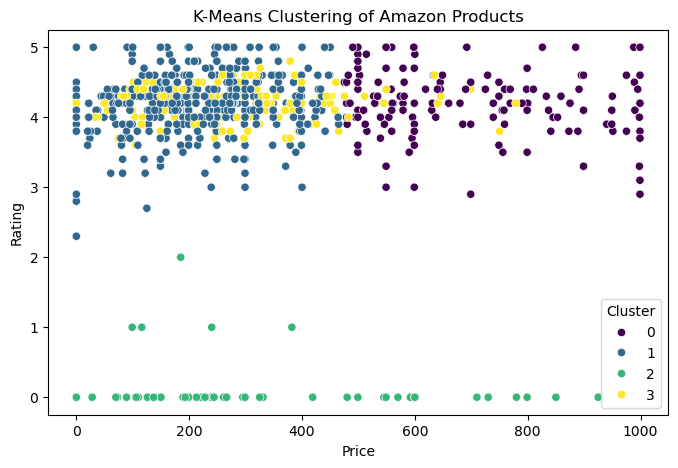

In [161]:
# Visualizing clusters (Price vs Rating)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Price", y="Rating", hue="Cluster", palette="viridis")
plt.title("K-Means Clustering of Amazon Products")
plt.show()

## DBSCAN CLUSTERING

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [170]:
# Load dataset (modify as per your dataset)
data = pd.read_csv('amazon_scraped_data.csv')  # Replace with your dataset

In [172]:
# Selecting numerical features for clustering
X = data.select_dtypes(include=[np.number])
X = X.dropna()

In [174]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [176]:
# 1. WSS (Elbow Method) for K-Means
wss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)


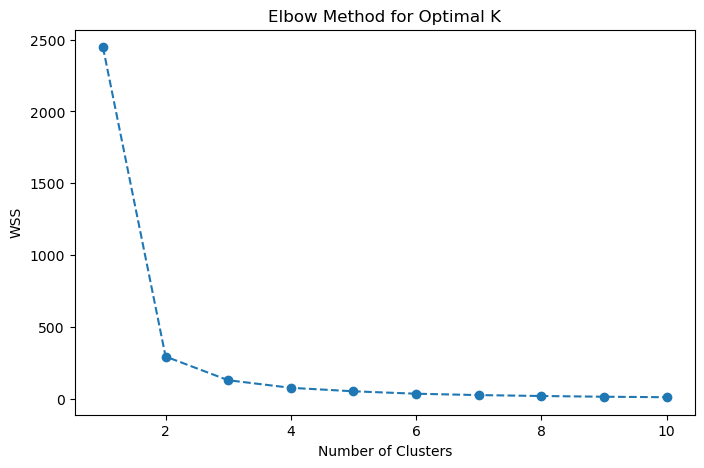

In [177]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [178]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = labels_dbscan

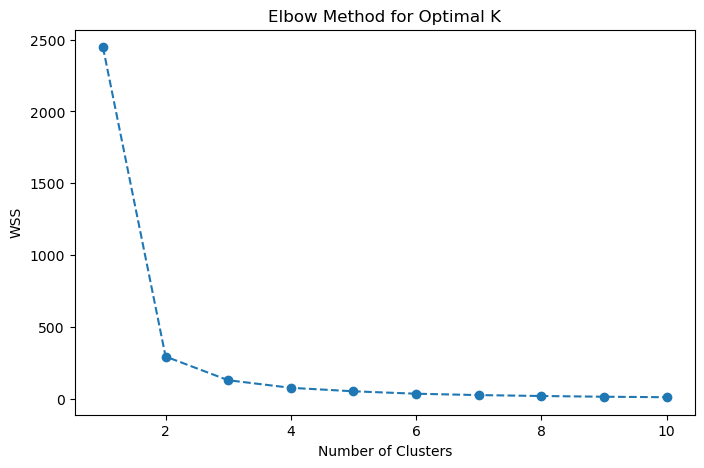

In [179]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [180]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = labels_dbscan

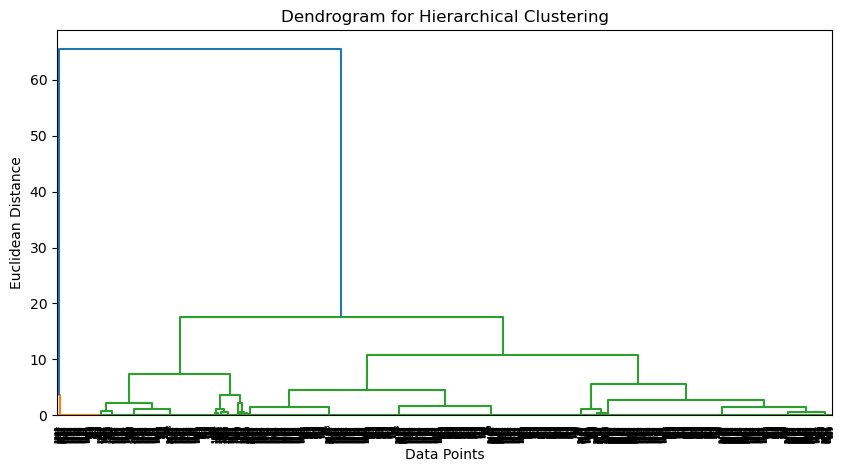

In [181]:
# 3. Hierarchical Clustering
dend = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(dend)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [188]:
# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Adjust clusters as needed
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)
data['Hierarchical_Cluster']

0       0
1       2
2       2
3       0
4       0
       ..
2442    0
2443    0
2444    0
2445    0
2446    2
Name: Hierarchical_Cluster, Length: 2447, dtype: int64

In [190]:
# Display clustered data
print(data.head())

                                               Title Price  Rating  \
0  Best sellerin BasmatiDaawat Rozana Super Basma...   349     4.0   
1  Daawat Sehat/Rozana Basmati Rice Mini Mogra, 5...   290     3.9   
2  India Gate Basmati Rice Everyday 5 kg3.8 out o...   362     3.8   
3  Best sellerin Sona MasuriDaawat Sona masuri 5 ...   332     4.1   
4  FORTUNE Sona Masoori Rice, 5 kg4.1 out of 5 st...   550     4.1   

  Number of Reviews Category  DBSCAN_Cluster  Hierarchical_Cluster  
0            18,904  Grocery               0                     0  
1             4,420  Grocery               0                     2  
2             2,447  Grocery               0                     2  
3             1,304  Grocery               0                     0  
4             2,934  Grocery               0                     0  


# SUPERVISOD LEARNING

In [315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix

In [317]:
# Load dataset (assuming df is preloaded)
df = pd.read_csv(r"amazon_scraped_data.csv")  # Replace with actual dataset path if needed

In [319]:
# Data Preprocessing
df = df.dropna()  # Remove missing values

In [321]:
# Convert Price and Number of Reviews to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce').fillna(0)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').fillna(0)

In [323]:
# Encode categorical labels
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [325]:
# Feature selection
x = df[['Price', 'Rating', 'Number of Reviews']]
y = df['Category']

In [327]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [329]:
# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression(LR)

In [332]:
log_model = LogisticRegression()

In [334]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [336]:
y_pred_log= log_model.predict(x_test)

In [338]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.5816326530612245


In [340]:
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.45      0.18      0.25        97
           2       0.71      0.85      0.77       239
           3       0.39      0.83      0.53        78

    accuracy                           0.58       490
   macro avg       0.39      0.46      0.39       490
weighted avg       0.50      0.58      0.51       490



C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## K-Nearest Neighbors (KNN) Classifier

In [343]:
knn_model = KNeighborsClassifier()

In [345]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [347]:
y_pred_knn= knn_model.predict(x_test)

In [349]:
y_pred_knn= knn_model.predict(x_test)

In [351]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.6428571428571429


In [353]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.46        76
           1       0.55      0.68      0.61        97
           2       0.76      0.71      0.73       239
           3       0.61      0.58      0.59        78

    accuracy                           0.64       490
   macro avg       0.60      0.61      0.60       490
weighted avg       0.65      0.64      0.64       490



## Naive Bayes Classifier(NB)

In [356]:
from sklearn.naive_bayes import GaussianNB

In [358]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [360]:
y_pred_NB = NB_model.predict(x_test)

In [362]:
print("Accuracy:", accuracy_score(y_test, y_pred_NB))

Accuracy: 0.5285714285714286


In [364]:
print("Classification Report:\n", classification_report(y_test, y_pred_NB))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.01      0.02        97
           2       0.64      0.82      0.71       239
           3       0.35      0.81      0.48        78

    accuracy                           0.53       490
   macro avg       0.50      0.41      0.30       490
weighted avg       0.56      0.53      0.43       490



C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Support Vector Machine (SVM)

In [367]:
svm_model = SVC(kernel='poly', gamma = 'scale', C=20)

In [369]:
svm_model.fit(x_train, y_train)

SVC(C=20, kernel='poly')

In [370]:
y_pred_svm = svm_model.predict(x_test)

In [373]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.6


In [375]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.62      0.35      0.45        97
           2       0.69      0.84      0.76       239
           3       0.41      0.76      0.53        78

    accuracy                           0.60       490
   macro avg       0.43      0.49      0.44       490
weighted avg       0.53      0.60      0.54       490



## Random Forest Classifier

In [378]:
RFC = RandomForestClassifier()

In [380]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [382]:
y_pred_RFC= RFC.predict(x_test)

In [384]:
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))

Accuracy: 0.6836734693877551


In [386]:
print("Classification Report:\n", classification_report(y_test, y_pred_RFC))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53        76
           1       0.58      0.68      0.63        97
           2       0.80      0.75      0.77       239
           3       0.62      0.65      0.64        78

    accuracy                           0.68       490
   macro avg       0.64      0.65      0.64       490
weighted avg       0.69      0.68      0.69       490



In [388]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [390]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "F1 Score": f1}

In [391]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  F1 Score
Logistic Regression  0.581633  0.511865
SVM                  0.610204  0.611252
k-NN                 0.642857  0.644967
Random Forest        0.677551  0.678823
XGBoost              0.677551  0.679913


## Hyperparameter Tuning

In [395]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [397]:
# Define the model
model = RandomForestClassifier(random_state=42)

In [399]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [401]:
# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [403]:
# Best parameters from Grid Search
print("Best parameters from Grid Search:", grid_search.best_params_)

Best parameters from Grid Search: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [405]:
# Random Search
random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [306]:
# Best parameters from Random Search
print("Best parameters from Random Search:", random_search.best_params_)

Best parameters from Random Search: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


In [307]:
# Train the best model
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [308]:
# Evaluate performance
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best model accuracy:", accuracy)

Best model accuracy: 0.6795918367346939
